# Set Up

In [74]:
# Will allow us to embed images in the notebook
%matplotlib inline

# Import Energy Data
Energy data can be obtained from your DNSP as a NEM12 file.

In [75]:
# Import NEM12 data
from nemreader import output_as_data_frames
file_path = '../examples/example.csv'
dfs = output_as_data_frames(file_path)
nmi, df = dfs[0] # Get data for first NMI in file
nmi = '*Redacted*'

# Timing Considerations

Energy billing data is reported by the meter at the end of the interval period. 

The energy reading on 2020-01-01T00:00 is actually for the last interval of the previous day/month/year.
That is 2019-12-31T23:30 to 2020-01-01T00:00 for a 30min interval reading.

So for analysis we want to report on interval start to ensure values are grouped properly.

![step](step-average.png)


In [76]:
df.set_index('period_start', inplace=True)
df.tail()

,period_end,B1,E1,E2,quality_method,event
period_start,,,,,,
2020-05-04 21:30:00,2020-05-04 22:00:00,0.0,0.10,0.0,A,
2020-05-04 22:00:00,2020-05-04 22:30:00,0.0,0.18,0.0,A,
2020-05-04 22:30:00,2020-05-04 23:00:00,0.0,0.15,0.0,A,
2020-05-04 23:00:00,2020-05-04 23:30:00,0.0,0.13,0.0,A,
2020-05-04 23:30:00,2020-05-05 00:00:00,0.0,0.13,0.0,A,


# Plot NMI Data

(<Figure size 864x244.8 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f82ca242cd0>,
       dtype=object))

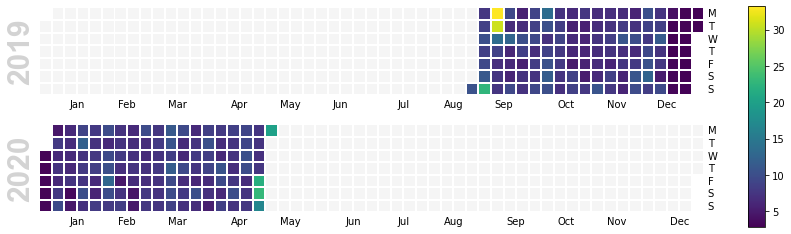

In [77]:
#Show quick daily summary
import pandas as pd
import calplot
calplot.calplot(pd.Series(df.E1), daylabels='MTWTFSS')

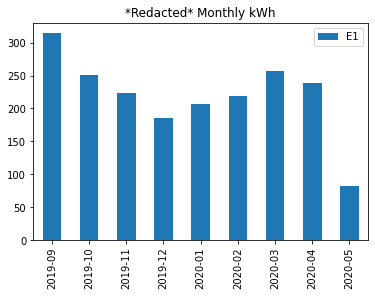

In [78]:
# Technically we should probably use a bar chart since they are totals
month_totals = df.groupby(df.index.strftime('%Y-%m')).sum()
month_totals.plot(title=nmi+" Monthly kWh", kind='bar', y=['E1'])

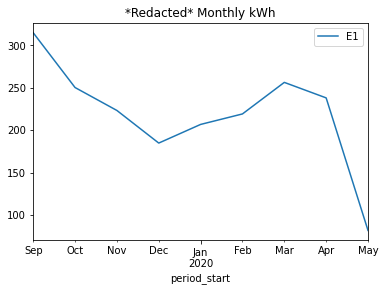

In [79]:
# But a line chart resampled by month shows better date axis labels
month_totals = df.resample('M').sum()
month_totals.plot(title=nmi+" Monthly kWh", y=['E1'])

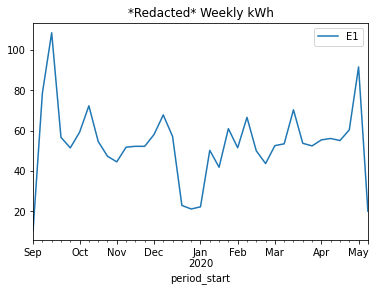

In [80]:
day_totals = df.resample('W').sum()
day_totals.plot(title=nmi+" Weekly kWh", y=['E1'])

# Daily Profiles

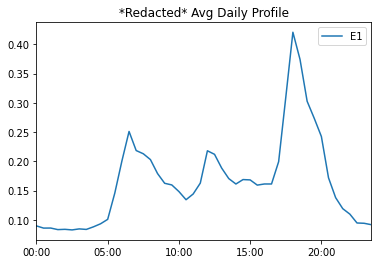

In [81]:
hourly_avg = df.groupby(df.index.strftime('%H:%M')).mean()
hourly_avg.plot(title=nmi+" Avg Daily Profile", y=['E1'])

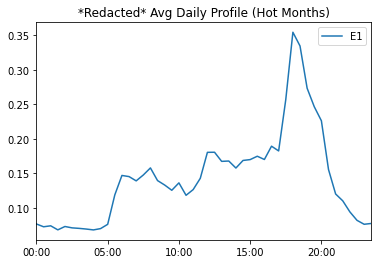

In [82]:
# Filter by summer months only 
summer_df = df.loc[df.index.month.isin([11, 12, 1, 2])]
summer_avg = summer_df.groupby(summer_df.index.strftime('%H:%M')).mean()
summer_avg.plot(title=nmi+" Avg Daily Profile (Hot Months)", y=['E1'])

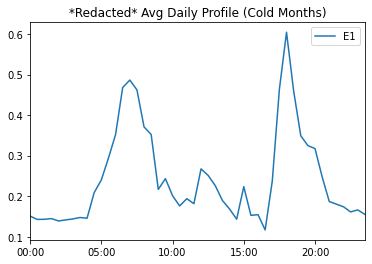

In [83]:
# Filter by winter months only 
winter_df = df.loc[df.index.month.isin([5, 6, 7, 8, 9])]
winter_avg = winter_df.groupby(winter_df.index.strftime('%H:%M')).mean()
winter_avg.plot(title=nmi+" Avg Daily Profile (Cold Months)", y=['E1'])